# Notebook to plot thermodynamic quantities from data

In [1]:
#import Pkg
#Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [1]:
# Import neccesary libraries
using DelimitedFiles
using LaTeXStrings
using Plots
using Statistics


### The following function returns a plot of the desired thermodynamics quantity

In [80]:
pgfplotsx()
function plt_data_pgf(protein_name::String,model_name::String,geometry::String,qty::String)
    pathname = "/Users/pedroruiz/Desktop/Resultados_sims/"*protein_name*"/"*model_name
   
    pathWL =  pathname*"/WL_"*protein_name*"_"*model_name*"_"*geometry
    pathMET = pathname*"/MET_"*protein_name*"_"*model_name*"_"*geometry
    
    tempsWL = vec(readdlm(pathWL*"/temperatures.csv"))
    tempsMET = vec(readdlm(pathMET*"/thermo_quantities/temperatures.csv"))
    
    if qty == "u"
        
        usWL = vec(readdlm(pathWL*"/us.csv",','))
        up = vec(readdlm(pathMET*"/thermo_quantities/up.csv"))
        uσs = vec(readdlm(pathMET*"/thermo_quantities/uσs.csv"))
        plt = plot(tempsMET,up,lw=1.8,color=RGB{Float64}(0.5,0.4,0.8),alpha=0.95,xlabel=L"T",label=L"\textrm{MET}",ribbon=uσs) 
        plot!(tempsWL,usWL,xlabel=L"T",ylabel=L"\langle E \rangle/N",label=L"\textrm{WL}",lw=2.3,color=RGB{Float64}(0.8,0.2,0.3),alpha=0.8,
        legend=:topleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13,titlefontsize=14)
        return plt
        
    elseif qty == "c"
        
        csWL = vec(readdlm(pathWL*"/cs.csv",','))
        cp = vec(readdlm(pathMET*"/thermo_quantities/cp.csv"))
        cσs = vec(readdlm(pathMET*"/thermo_quantities/cσs.csv"))
        plt = plot(tempsMET,cp,lw=1.8,color=RGB{Float64}(0.5,0.4,0.8),alpha=0.95,xlabel=L"T",label=L"\textrm{MET}",ribbon=cσs,legend=:topright)
        plot!(tempsWL,csWL,xlabel=L"T",ylabel=L"C_{V}/N",label=L"\textrm{WL}",lw=2.2,color=RGB{Float64}(0.8,0.2,0.3),alpha=0.78,
        xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13,titlefontsize=14)
        return plt
        
    elseif qty == "F"
    
        FsWL = vec(readdlm(pathWL*"/Fs.csv",','))
        plt = plot(tempsWL,FsWL,xlabel=L"T",label="",ylabel=L"F/N",lw=3.2,color=RGB{Float64}(0.9,0.4,0.05),alpha=0.7,
        title=L"\textrm{Ch}",legend=:topright,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13,
        titlefontsize=14)
        #scatter!(tempsWL3[1:12:400],FsWL3[1:12:400],label="",color=RGB{Float64}(0.9,0.4,0.05),ms=4.5,alpha=0.9)
        return plt
        
        
    elseif qty == "S"
        
        SsWL = vec(readdlm(pathWL*"/Ss.csv",','))
        plt = plot(tempsWL,SsWL,xlabel=L"T",ylabel=L"S/N",label="",lw=3.2,color=RGB{Float64}(0.3,0.9,0.65),alpha=0.7,title=L"\textrm{Ch}",
        xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13,titlefontsize=14)
        #scatter!(tempsWL4[1:10:400],SsWL3[1:10:400],label="",color=RGB{Float64}(0.2,0.95,0.5),ms=4.5,alpha=0.8)
        return plt
        
        
    end
    
end

plt_data_pgf (generic function with 1 method)

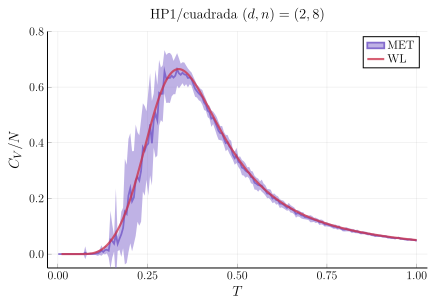

In [84]:
plt = plt_data_pgf("chignolin","HP1","triangular","c")
title!(L"\textrm{HP1/cuadrada }(d,n)=(2,8)")
ylims!((-0.05,0.8))

In [18]:
savefig(plt,"/Users/pedroruiz/Desktop/Resultados_sims/chignolin/HP1/c_square.pdf")

***

***
***

## Simple exact HP model graphs

In [51]:
using Plots
using LaTeXStrings

Plots.GRBackend()

In [3]:
function u(T)
    β = 1/T
    eb = exp(β)
    return - (eb)/(4(4+eb))
end

function c(T)
    β = 1/T
    eb = exp(β)
    a = 4*(β^2)*eb
    b = (4+eb)^2
    return a/(4*b)
end

function S(T)
    β = 1/T
    eb = exp(β)
    a = - (β*eb)/(4+eb)
    b = log(4+eb)
    return a+b
end

function F(T)
    β = 1/T
    eb = exp(β)
    a = (-T)*log(4+eb)
    return a
end

F (generic function with 1 method)

In [4]:
pgfplotsx()
function pltu(ti,tf,nTs)
    temps = range(ti,stop=tf, length=nTs)
    us = Float64[u(T) for T in temps]
    plt=plot(temps,us,lw=2.8,color=RGB{Float64}(0.8,0.2,0.3),xlabel=L"$T$",ylabel=L"\langle E \rangle/N",label="",title="",
    alpha=0.8,legend=:topleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

function pltc(ti,tf,nTs)
    temps = range(ti,stop=tf, length=nTs)
    cs = Float64[c(T) for T in temps]
    plt=plot(temps,cs,lw=2.8,color=RGB{Float64}(0.6,0.4,0.85),xlabel=L"$T$",ylabel=L"C_{V}/N",label="",title="",
    alpha=0.8,legend=:topleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

function pltS(ti,tf,nTs)
    temps = range(ti,stop=tf, length=nTs)
    Ss = Float64[S(T) for T in temps]
    plt=plot(temps,Ss,lw=2.8,color="purple",xlabel=L"$T$",ylabel=L"$S(T)$",label="",title="",
    alpha=0.65,legend=:topleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

function pltF(ti,tf,nTs)
    temps = range(ti,stop=tf, length=nTs)
    Fs = Float64[F(T) for T in temps]
    plt=plot(temps,Fs,lw=2.8,color="green",xlabel=L"$T$",ylabel=L"$F(T)$",label="",title="",
    alpha=0.65,legend=:topleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

pltF (generic function with 1 method)

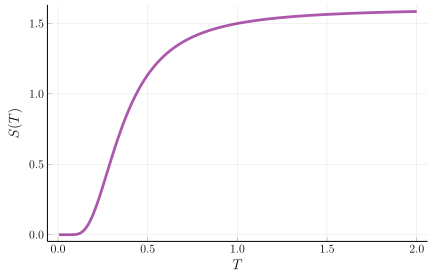

In [13]:
figt = pltS(0.001,2.0,500)

In [14]:
savefig(figt,"/Users/pedroruiz/Desktop/tetra_Ss.pdf")